<a href="https://colab.research.google.com/github/5hahik/DSPL-Tutorial-7/blob/main/Tutorial_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Task 2

In [5]:
# Calculate the median blood pressure for people diagnosed with diabetes.
median_blood_pressure = df[df['Outcome'] == 1]['BloodPressure'].median()
print(f"The median blood pressure for people diagnosed with diabetes is: {median_blood_pressure}")


The median blood pressure for people diagnosed with diabetes is: 74.0


Task 3

In [6]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


The dataset is not balanced as there is way more individuals not diagnosed with diabetes

Task 4

In [7]:
X = df.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
Y = df['Outcome']
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Task 5

Using stratify Y ensures bothy datasets X and Y, maintain the same proportion as as the orginal dataset. This leads to fairer evaluation of the model


Task 6

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1, stratify=Y)

Task 7

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_d = DecisionTreeClassifier()
dt_d.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score
Y_pred = dt_d.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.71875

Task 8

In [12]:
from sklearn.metrics import accuracy_score
Y_train_pred = dt_d.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

1.0

In [13]:
from sklearn.metrics import accuracy_score
Y_test_pred = dt_d.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.71875

It's only giving accuracy level of 73% on test.

Task 9

Basically precision is the measurement that gives  how many of the predicted positive cases were actually correct. According to the case scenario, 77% of predicted class 0 cases were actually 0. 71% of predicted class 1 cases were actually 1.

Recall gives the how many actual positive cases were correctly identified. According to given scenario,89% of actual class 0 cases were correctly identified. 50% of actual class 1 cases were correctly identified.

Task 10

In [14]:
#Create a confusion matrix to analyse the performance of the DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[104,  21],
       [ 33,  34]])

The true negatives(105) and true positive(20) are higher than the false negative(32) and false positive(35). This model is sensitive predectind diabetic.

In [15]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       125
           1       0.62      0.51      0.56        67

    accuracy                           0.72       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.71      0.72      0.71       192



Task 11

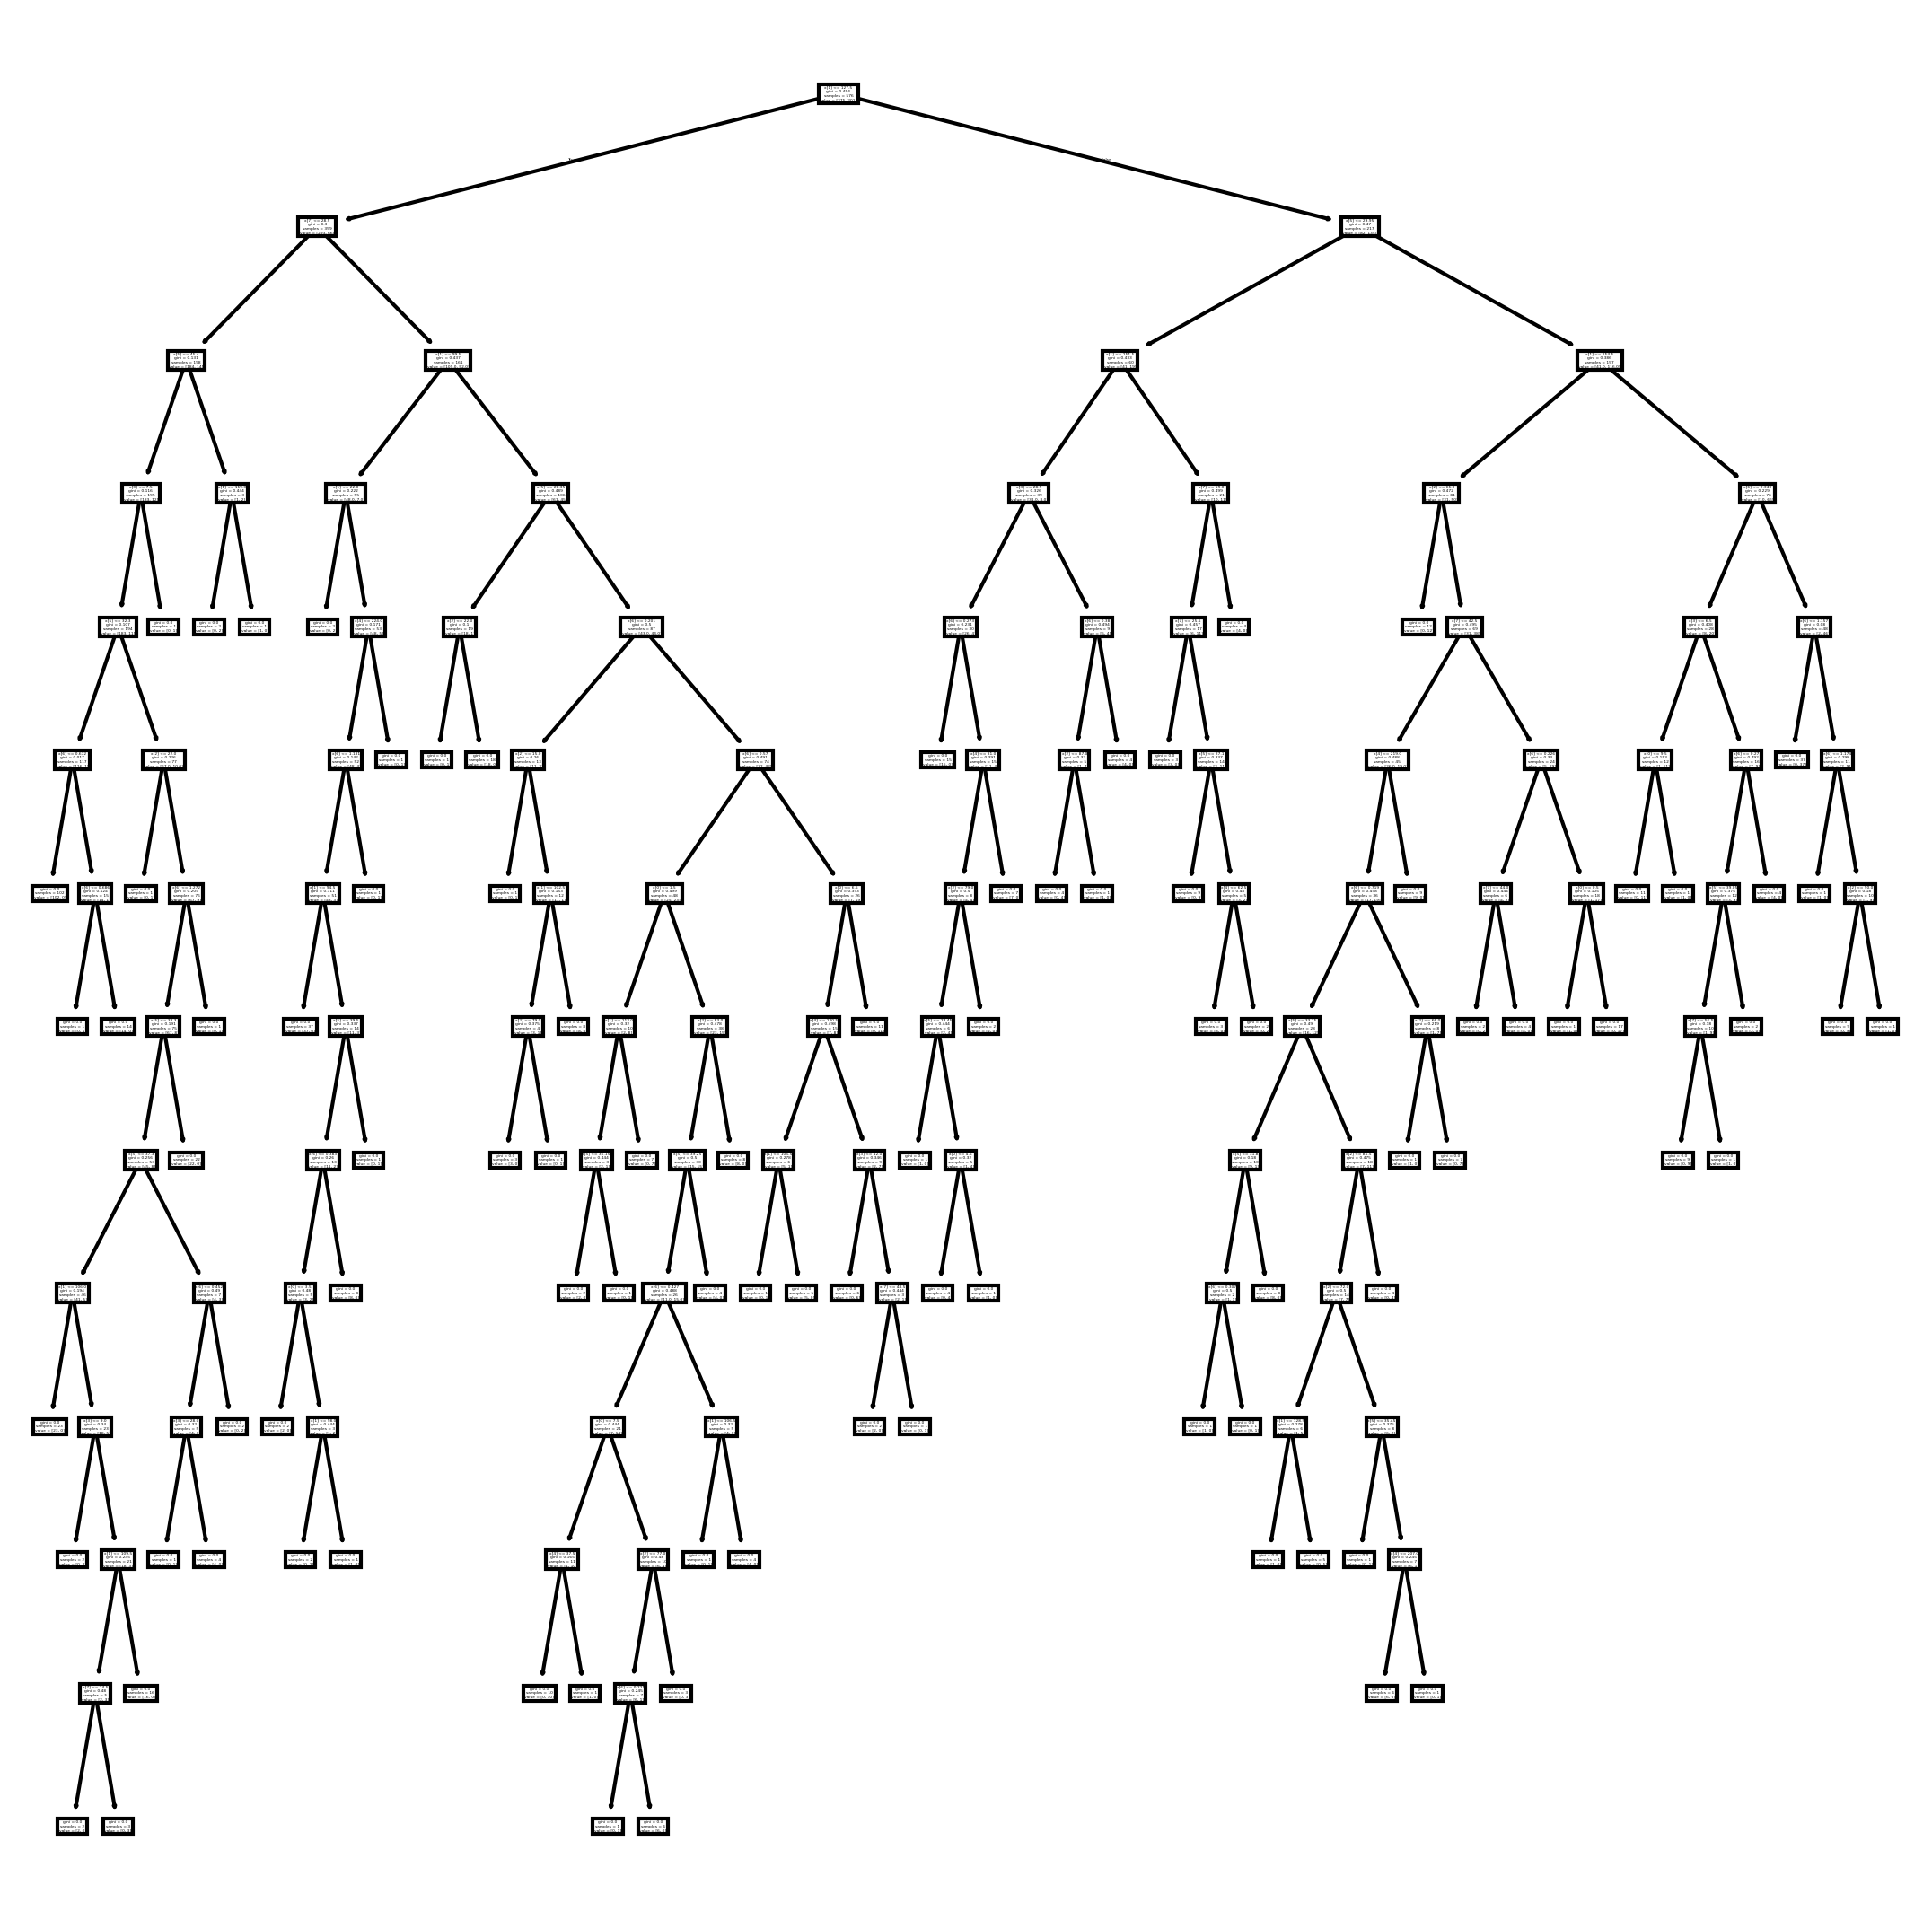

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9), dpi=300)
tree.plot_tree(dt_d)
plt.show()


Task 13

In [17]:
# KNeighboursClassifier with 4 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
#confustion matrix
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[106,  19],
       [ 44,  23]])

In [19]:
#classication report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       125
           1       0.55      0.34      0.42        67

    accuracy                           0.67       192
   macro avg       0.63      0.60      0.60       192
weighted avg       0.65      0.67      0.65       192



task 14

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_w = pd.read_csv('pm25_2016_2020.csv')
df_w.head()

Task 15

In [ ]:
x = df_w[['latitude_x', 'longitude_x']]
x

Task 16

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
x["Clusters"] = kmeans.fit_predict(x)
x["Clusters"] = x["Clusters"].astype("category")
x

Task 17

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
x["Clusters"] = kmeans.fit_predict(x)
x["Clusters"] = x["Clusters"].astype("category")
x

Task 17

In [ ]:
x["Clusters"].value_counts()

Task 18

In [ ]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.relplot(x='latitude_x',y='longitude_x',hue='Clusters',data=x,palette='viridis')